## Import Libraries

In [41]:
# Data manipulation
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [42]:
# Load dataset
df = pd.read_csv('../data/raw/Superstore.csv', encoding='latin-1')

print("="*40)
print("DATASET OVERVIEW")
print("="*40)
print(f"Dataset Shape: {df.shape[0]} rows x {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(""+ "="*40)

# Display first few rows
df.head()

DATASET OVERVIEW
Dataset Shape: 9994 rows x 21 columns
Memory Usage: 10.37 MB


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [43]:
# Data information
print("DATA TYPES & MISSING VALUES\n")

df.info()

print("\n" + "="*60)
print("MISSING VALUES")
print("="*60)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing[missing > 0])

DATA TYPES & MISSING VALUES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non

In [44]:
# Statistic summary
print("STATISTIC SUMMARY (NUMERICAL COLUMNS)")
df.describe()

STATISTIC SUMMARY (NUMERICAL COLUMNS)


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Univariate Analysis

Analisis distribusi masing-masing variabel

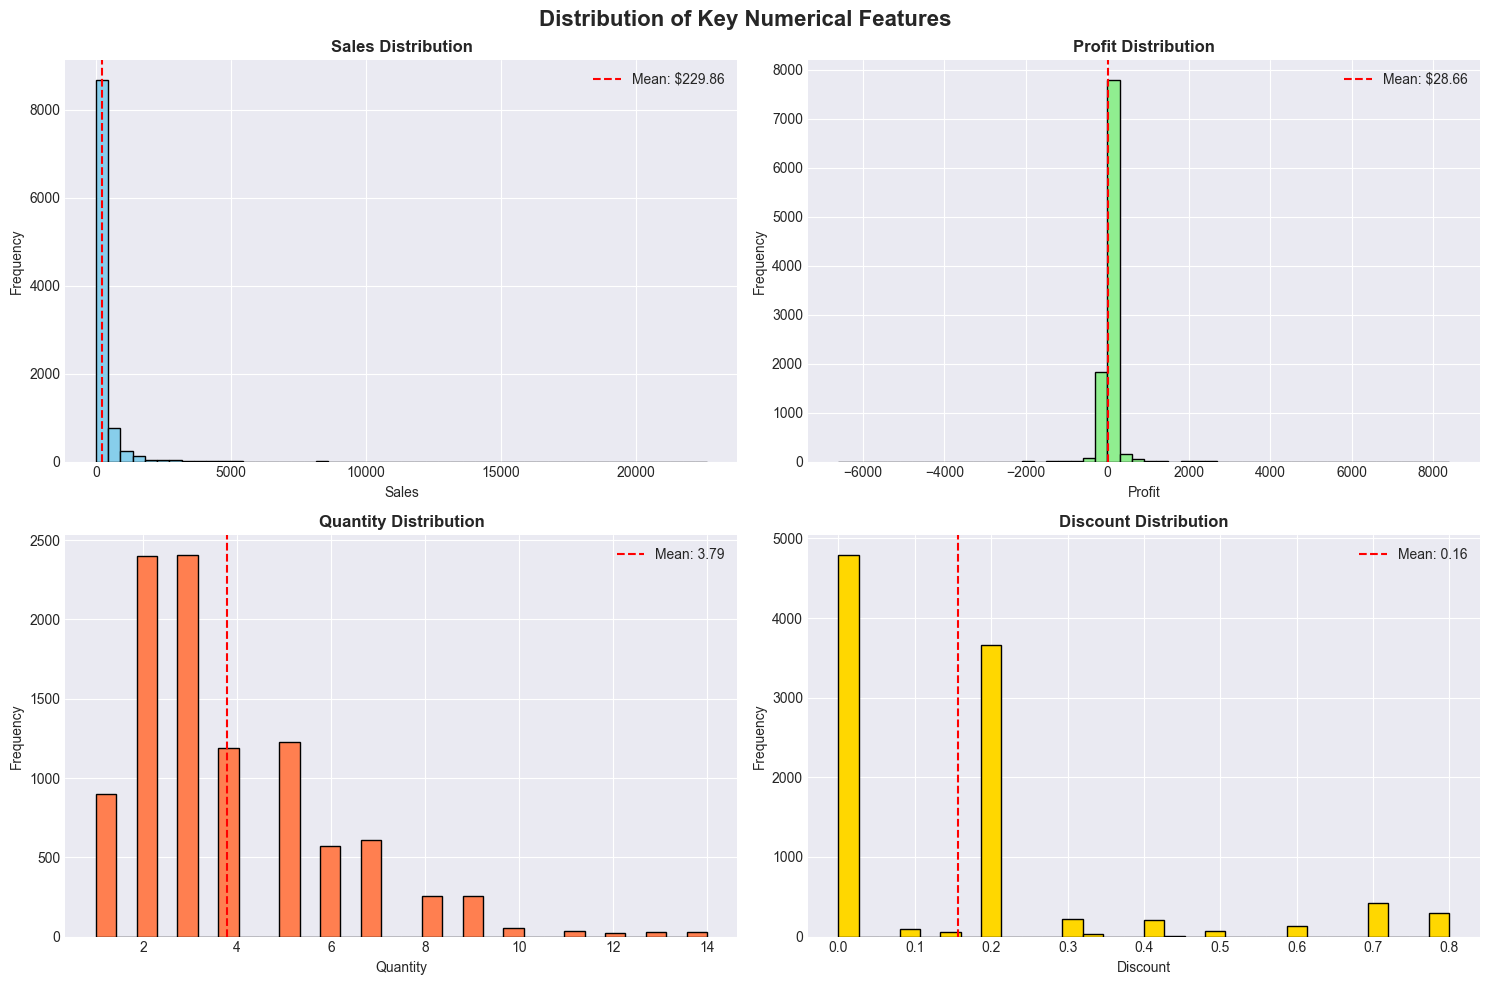

In [45]:
# Distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Numerical Features', fontsize=16, fontweight='bold')

# Sales
axes[0, 0].hist(df['Sales'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Sales Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Sales')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Sales'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Sales"].mean():.2f}')
axes[0, 0].legend()

# Profit
axes[0, 1].hist(df['Profit'], bins=50, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Profit Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Profit')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['Profit'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Profit"].mean():.2f}')
axes[0, 1].legend()

# Quantity
axes[1, 0].hist(df['Quantity'], bins=30, color='coral', edgecolor='black')
axes[1, 0].set_title('Quantity Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['Quantity'].mean(), color='red', linestyle='--', label=f'Mean: {df["Quantity"].mean():.2f}')
axes[1, 0].legend()

# Discount
axes[1, 1].hist(df['Discount'], bins=30, color='gold', edgecolor='black')
axes[1, 1].set_title('Discount Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Discount')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(df['Discount'].mean(), color='red', linestyle='--', label=f'Mean: {df["Discount"].mean():.2f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## Categorical Features Analysis

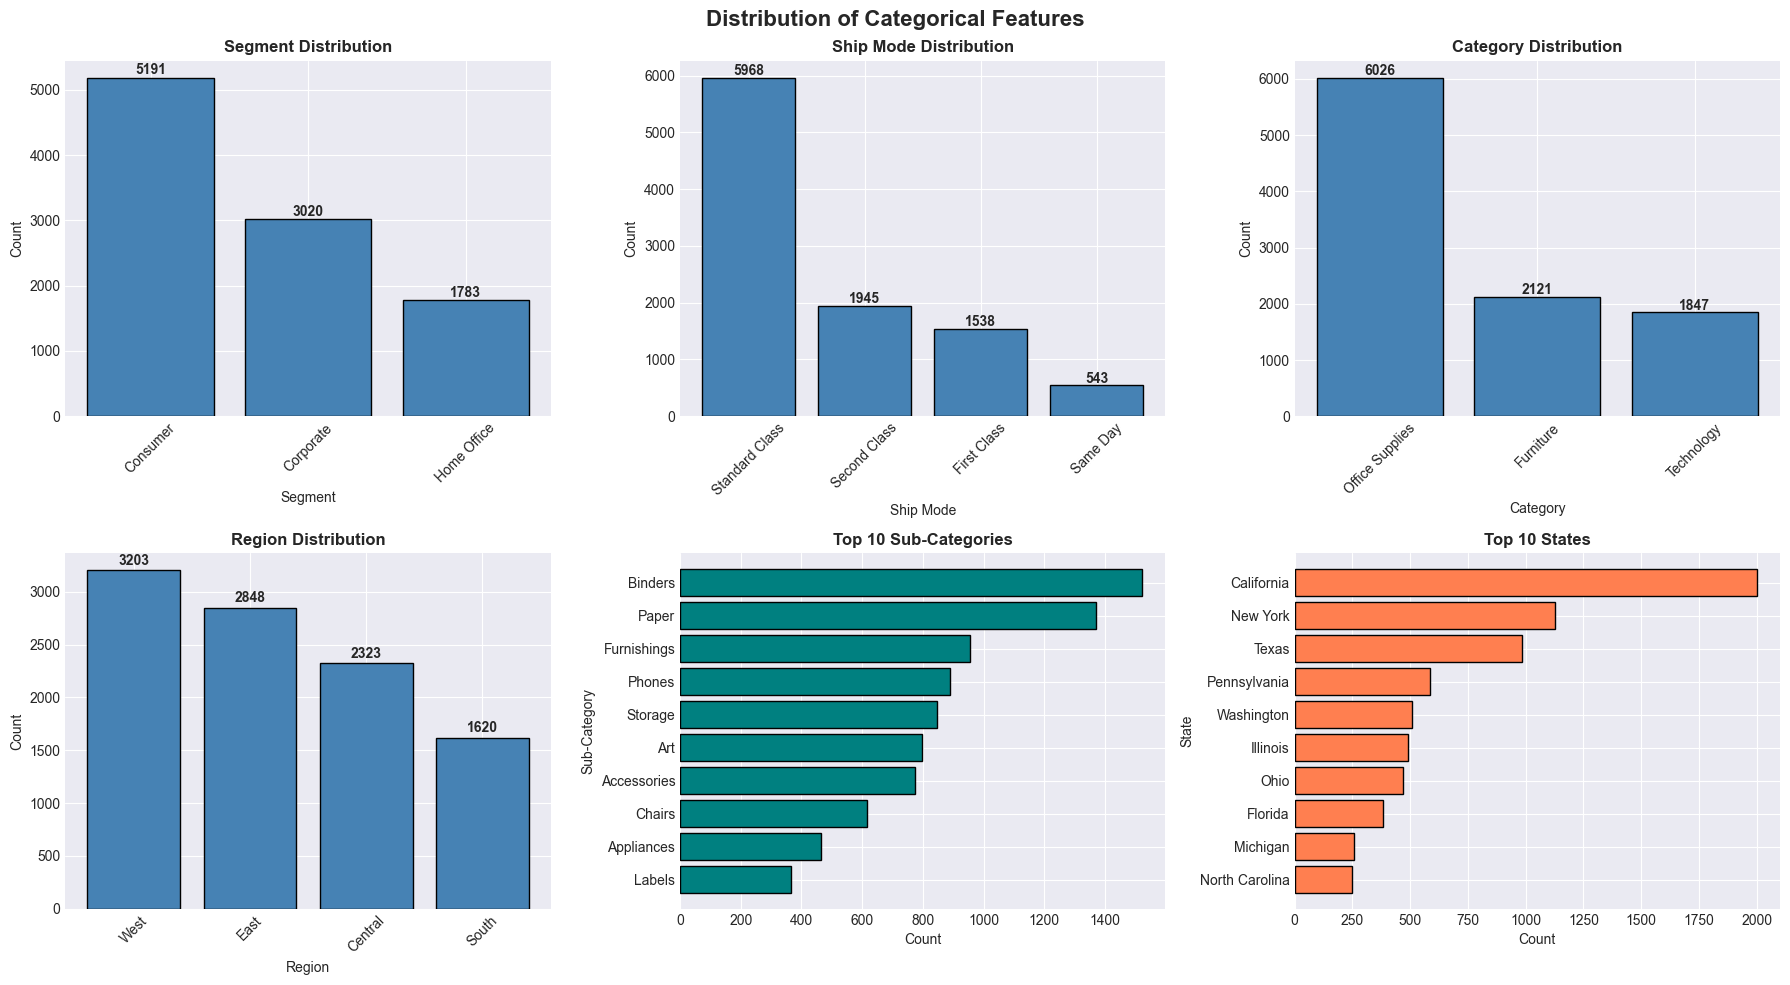

In [46]:
# Categorical features distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold')

categorical_cols = ['Segment', 'Ship Mode', 'Category', 'Region']

for idx, col in enumerate(categorical_cols):
    row = idx // 3
    col_idx = idx % 3
    
    value_counts = df[col].value_counts()
    axes[row, col_idx].bar(value_counts.index, value_counts.values, color='steelblue', edgecolor='black')
    axes[row, col_idx].set_title(f'{col} Distribution', fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Count')
    axes[row, col_idx].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[row, col_idx].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Sub-Category (top 10)
top_subcategories = df['Sub-Category'].value_counts().head(10)
axes[1, 1].barh(top_subcategories.index, top_subcategories.values, color='teal', edgecolor='black')
axes[1, 1].set_title('Top 10 Sub-Categories', fontweight='bold')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Sub-Category')
axes[1, 1].invert_yaxis()

# State (top 10)
top_states = df['State'].value_counts().head(10)
axes[1, 2].barh(top_states.index, top_states.values, color='coral', edgecolor='black')
axes[1, 2].set_title('Top 10 States', fontweight='bold')
axes[1, 2].set_xlabel('Count')
axes[1, 2].set_ylabel('State')
axes[1, 2].invert_yaxis()

plt.tight_layout()
plt.show()

## Sales and Profit Analysis by Category

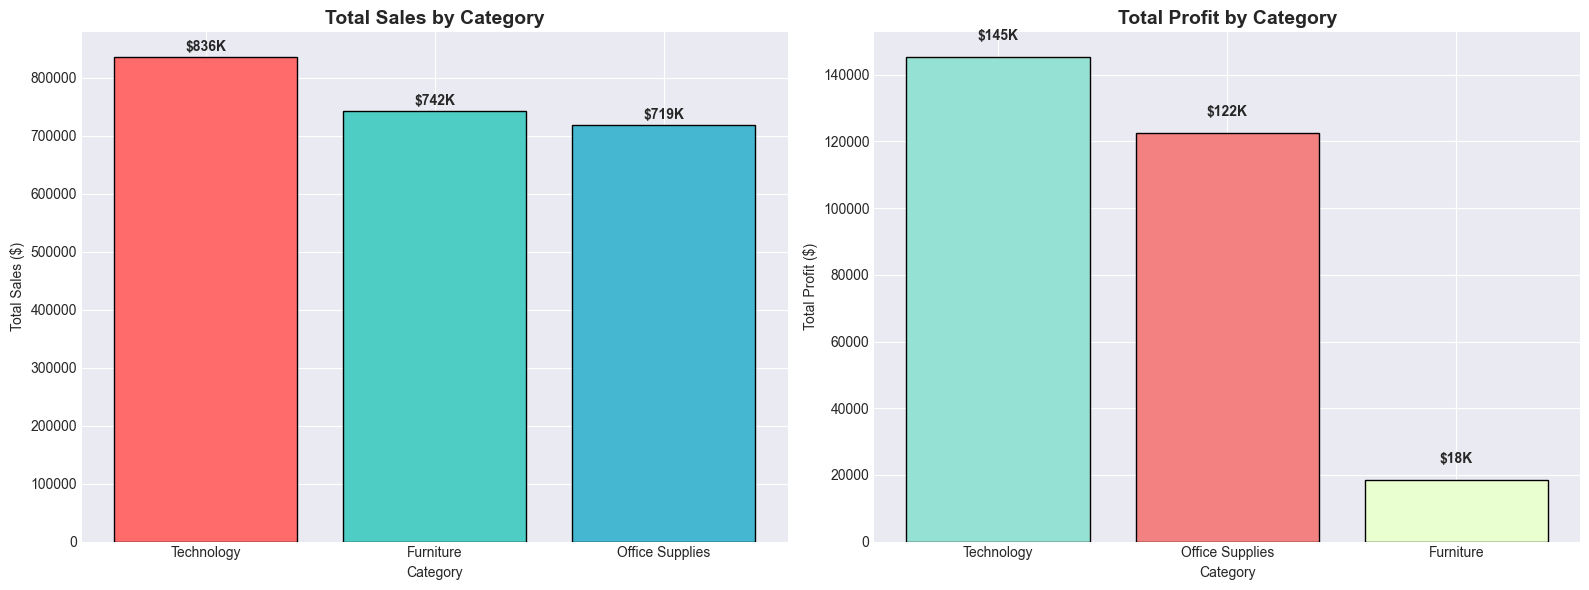


Category Performance:
                     Sales             Profit        Quantity
                       sum    mean        sum   mean      sum
Category                                                     
Furniture        741999.80  349.83   18451.27   8.70     8028
Office Supplies  719047.03  119.32  122490.80  20.33    22906
Technology       836154.03  452.71  145454.95  78.75     6939


In [47]:
# Sales and Profit by Category
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
axes[0].bar(sales_by_category.index, sales_by_category.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], edgecolor='black')
axes[0].set_title('Total Sales by Category', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Total Sales ($)')
axes[0].set_xlabel('Category')
for i, v in enumerate(sales_by_category.values):
    axes[0].text(i, v + 10000, f'${v/1000:.0f}K', ha='center', fontweight='bold')

# Profit by Category
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
axes[1].bar(profit_by_category.index, profit_by_category.values, color=['#95E1D3', '#F38181', '#EAFFD0'], edgecolor='black')
axes[1].set_title('Total Profit by Category', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Total Profit ($)')
axes[1].set_xlabel('Category')
for i, v in enumerate(profit_by_category.values):
    axes[1].text(i, v + 5000, f'${v/1000:.0f}K', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nCategory Performance:")
category_stats = df.groupby('Category').agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Quantity': 'sum'
}).round(2)
print(category_stats)

## Regional and Segment Analysis

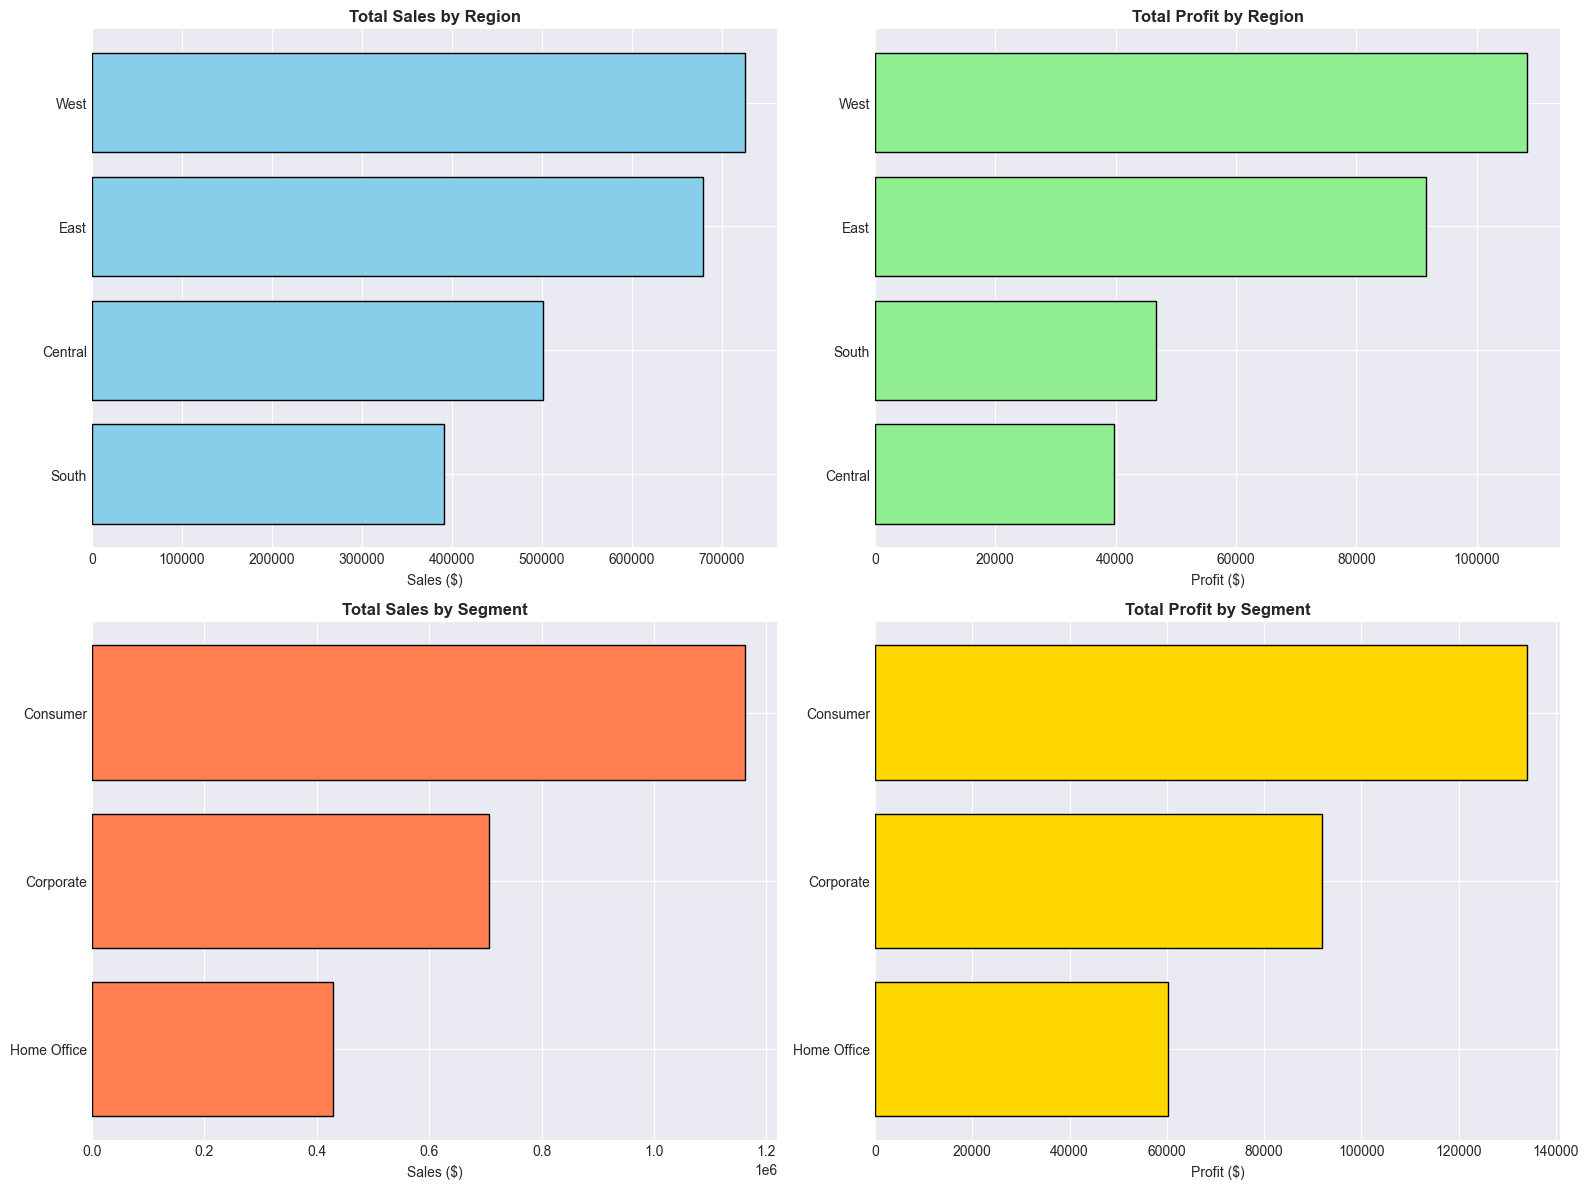

In [48]:
# Regional Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sales by Region
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=True)
axes[0, 0].barh(sales_by_region.index, sales_by_region.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Total Sales by Region', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sales ($)')

# Profit by Region
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=True)
axes[0, 1].barh(profit_by_region.index, profit_by_region.values, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Total Profit by Region', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Profit ($)')

# Sales by Segment
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=True)
axes[1, 0].barh(sales_by_segment.index, sales_by_segment.values, color='coral', edgecolor='black')
axes[1, 0].set_title('Total Sales by Segment', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sales ($)')

# Profit by Segment
profit_by_segment = df.groupby('Segment')['Profit'].sum().sort_values(ascending=True)
axes[1, 1].barh(profit_by_segment.index, profit_by_segment.values, color='gold', edgecolor='black')
axes[1, 1].set_title('Total Profit by Segment', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Profit ($)')

plt.tight_layout()
plt.show()

## Time Series Analysis

In [49]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')

# Extract time features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['DayOfWeek'] = df['Order Date'].dt.dayofweek
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

print(f"\nDate range: {df['Order Date'].min()} to {df['Order Date'].max()}")
print(f"Average delivery time: {df['Delivery_Days'].mean():.1f} days")


Date range: 2011-01-04 00:00:00 to 2014-12-31 00:00:00
Average delivery time: 4.0 days


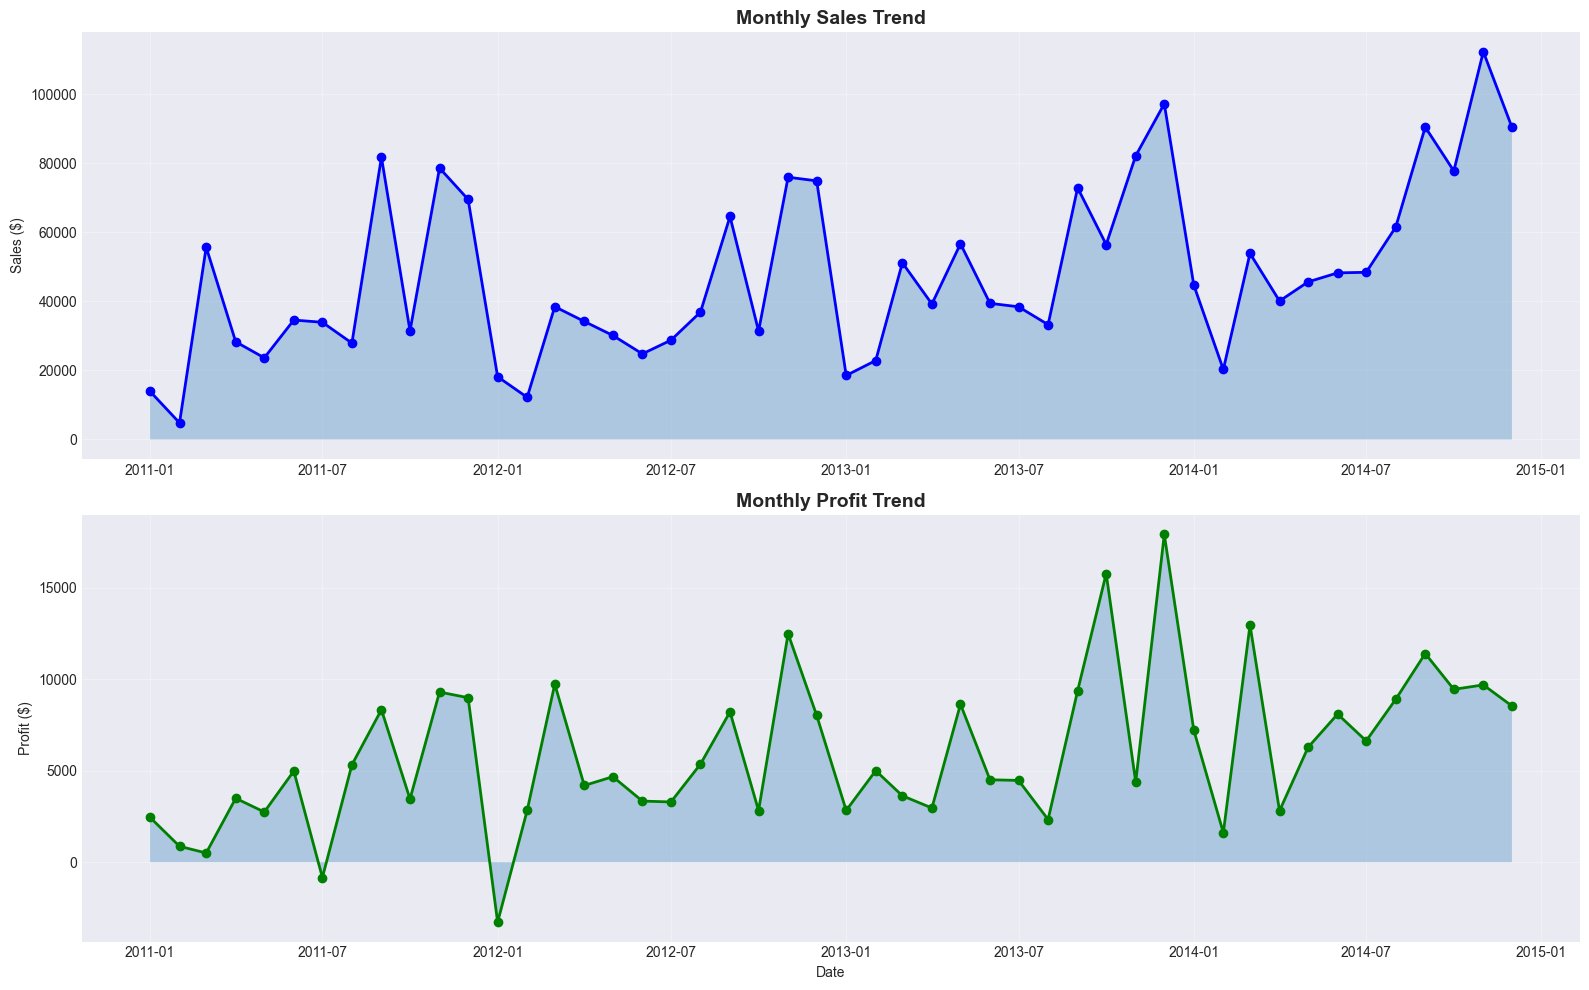

In [50]:
# Monthly sales trend
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Sales trend
axes[0].plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', linewidth=2, color='blue')
axes[0].set_title('Monthly Sales Trend', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Sales ($)')
axes[0].grid(True, alpha=0.3)
axes[0].fill_between(monthly_sales['Order Date'], monthly_sales['Sales'], alpha=0.3)

# Profit trend
axes[1].plot(monthly_sales['Order Date'], monthly_sales['Profit'], marker='o', linewidth=2, color='green')
axes[1].set_title('Monthly Profit Trend', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Profit ($)')
axes[1].set_xlabel('Date')
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(monthly_sales['Order Date'], monthly_sales['Profit'], alpha=0.3)

plt.tight_layout()
plt.show()

## Correlation Analysis

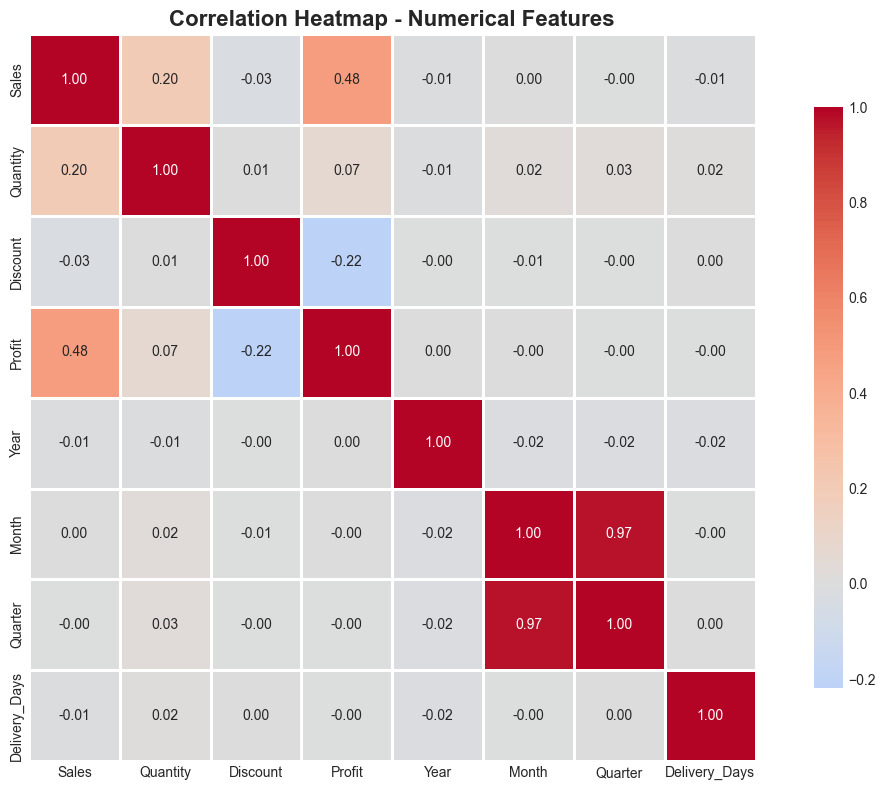


 Key Insights:
✓ Sales vs Profit correlation: 0.479
✓ Discount vs Profit correlation: -0.219
✓ Quantity vs Sales correlation: 0.201


In [51]:
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Quarter', 'Delivery_Days']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Correlation Heatmap - Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n Key Insights:")
print(f"✓ Sales vs Profit correlation: {correlation_matrix.loc['Sales', 'Profit']:.3f}")
print(f"✓ Discount vs Profit correlation: {correlation_matrix.loc['Discount', 'Profit']:.3f}")
print(f"✓ Quantity vs Sales correlation: {correlation_matrix.loc['Quantity', 'Sales']:.3f}")

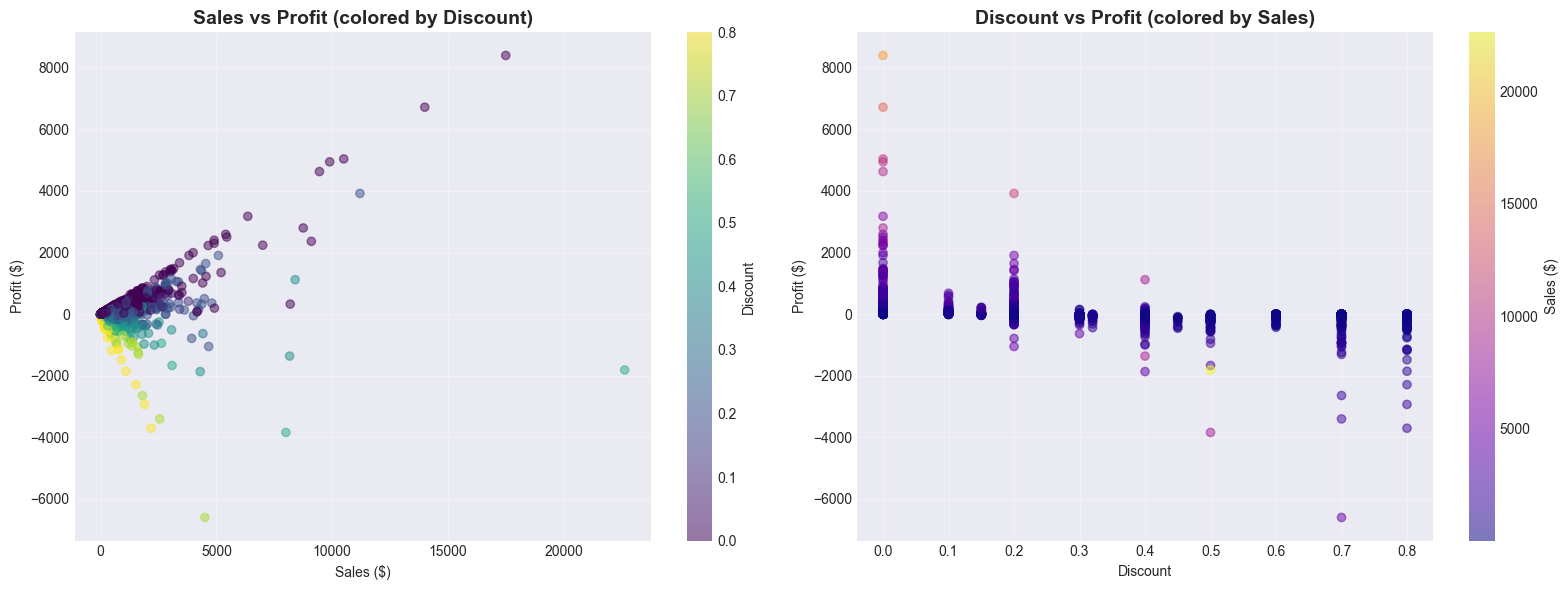

In [52]:
# Scatter plot: Sales vs Profit
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sales vs Profit
axes[0].scatter(df['Sales'], df['Profit'], alpha=0.5, c=df['Discount'], cmap='viridis')
axes[0].set_title('Sales vs Profit (colored by Discount)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sales ($)')
axes[0].set_ylabel('Profit ($)')
axes[0].grid(True, alpha=0.3)
cbar0 = plt.colorbar(axes[0].collections[0], ax=axes[0])
cbar0.set_label('Discount')

# Discount vs Profit
axes[1].scatter(df['Discount'], df['Profit'], alpha=0.5, c=df['Sales'], cmap='plasma')
axes[1].set_title('Discount vs Profit (colored by Sales)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Discount')
axes[1].set_ylabel('Profit ($)')
axes[1].grid(True, alpha=0.3)
cbar1 = plt.colorbar(axes[1].collections[0], ax=axes[1])
cbar1.set_label('Sales ($)')

plt.tight_layout()
plt.show()

## Save Processed Data

In [53]:
df.to_csv('../data/process/superstore_with_features.csv', index=False)
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")


Dataset shape: (9994, 26)
Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Quarter', 'DayOfWeek', 'Delivery_Days']


## 10. Key Insights Summary

**Findings dari EDA:**
1. Sales dan Profit memiliki korelasi positif yang kuat
2. Discount memiliki korelasi negatif dengan Profit
3. Technology adalah kategori dengan sales tertinggi
4. Terdapat tren musiman dalam penjualan
5. Region West memiliki performa penjualan terbaik